# Data Cleaning Notebook

In this notebook, we explore and clean our initial dataset. We have a dataframe containing meausrements of coral reef cover off of several coasts in the U.S. Virgin islands. The areas are divided into quadrats (areas subdivided into squares) and then are measured by the proportion of the seafloor that is covered in each coral species. 

### Holding Data for Model Evaluation
We plan to tuck away the data from the most recent couple of years and use that as a testing dataset after our model has been trained and optimized. Unfortunately this data will not be independent of the years before (e.g. 2020 coral reef cover is expected to depend on the cover from 2019). However, we care about predicting coral cover in future years, so splitting our data by time will make the most sense for the goal of our project.

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [14]:
df = pd.read_csv("coral_dataset.csv", index_col = "Date") #read in the dataset 

In [15]:
df #print and look at the data set 

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB
Date,,,,,,
1987/12/01,Tektite,1,T1Q1,16.5,3.5,6
1987/12/01,Tektite,1,T1Q2,10,6,74
1987/12/01,Tektite,1,T1Q3,13.5,3.5,45
1987/12/01,Tektite,1,T1Q4,15.5,6.5,61.5
1987/12/01,Tektite,1,T1Q5,19,4,48
...,...,...,...,...,...,...
2021/07/01,Yawzi,nd,6,0.0,30.0,50.0
2021/07/01,Yawzi,nd,7,0.0,28.5,45.5
2021/07/01,Yawzi,nd,8,0.5,35.0,35.0


In [16]:
print(df['percentCover_CTB'].unique()) #check the unique values of the column

['6' '74' '45' '61.5' '48' '10' '3' '29' '38' '30.5' '31.5' '26' '24'
 '11.5' '14.5' '19' '15.5' '22' '16' '19.3' '31' '39' '30' '19.5' '20.5'
 '44.5' '63' '39.5' '46' '62' '6.8' '38.5' '32.5' '21' '36.5' '25.5'
 '10.5' '18' '12.5' '24.5' '32' '14' '25' '33.5' '40.5' '29.8' '33' '41'
 '9' '34.5' '23' '27.5' '29.5' '7.5' '7' '26.5' '22.5' '16.5' '12' '17'
 '16.1' '17.5' '35.5' '50' '37.5' '27' '18.5' '9.5' '37' '41.5' '51'
 '49.5' '20' '42.5' '21.5' '43.5' '40' '28.5' '28' '23.5' '6.5' '15' '11'
 '34' '8.5' '8' '13' '13.5' '36' '30.3' '32.3' '25.6' '30.9' '17.2' '28.8'
 '5.3' '15.1' '15.6' '25.9' '22.6' '8.9' '10.3' '7.6' '8.7' '8.8' '7.3'
 '5.6' '0' '1.6' '25.3' '40.7' '3.2' '4.5' '2.5' '3.5' '5' '18.7' '18.8'
 '20.8' '8.1' '2.6' '12.3' '14.9' '14.1' '2.7' '15.9' '12.8' '15.7' '6.6'
 '13.8' '1.1' '2.2' '33.2' '23.7' '31.4' '26.2' '1' '7.4' '18.6' '4' '1.5'
 '5.5' '22.3' '11.1' '12.2' '11.2' '24.7' '8.2' '4.1' '7.7' '14.3' '9.7'
 '10.2' '10.7' '5.1' '22.7' '17.9' '2' '9.9' '36.2' '30.8'

In [17]:
print(len(df)) #print the amount of rows of the dataset
#check and print the amount of times there is no data given in the entry for our three main columns
specific_value_count = df['percentCover_CTB'].value_counts()['nd']
print(specific_value_count)
specific_value_count = df['percentCover_macroalgae'].value_counts()['nd']
print(specific_value_count)
specific_value_count = df['percentCover_allCoral'].value_counts()['nd']
print(specific_value_count)


2283
19
19
9


Based on the previous numbers we can drop all of the rows who have "nd" as the value in our main three columns without losing a bunch of data. 

In [18]:
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
print(len(df))

2264


This leaves us with 2,264 individual rows of data to work with.

In [19]:
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral

In [20]:
# convert the date column to date time objects
df.index = pd.to_datetime(df.index)

In [21]:
df #print the dataset with the new feature

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480
...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300


Plot percentage of coral coverage

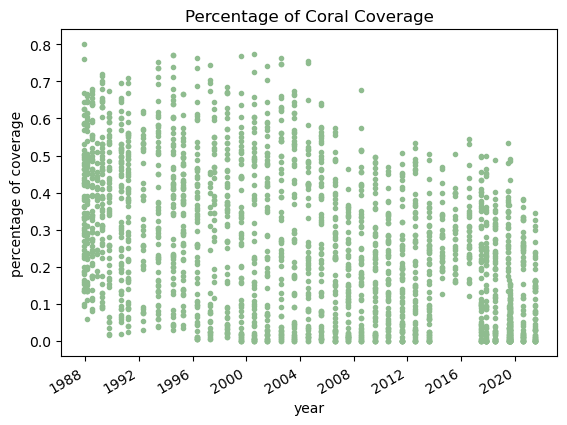

In [22]:
df.plot(y = "percentCover_allCoral", linestyle = 'None', marker = '.', color = 'darkseagreen', title = 'Percentage of Coral Coverage', ylabel='percentage of coverage', xlabel = 'year',legend=False)
plt.show()

In this plot we can see all the data points of coral reef coverage. While there are seom small outliers, there doesn't appear to be anything extreme enough that we would need to drop that data point.

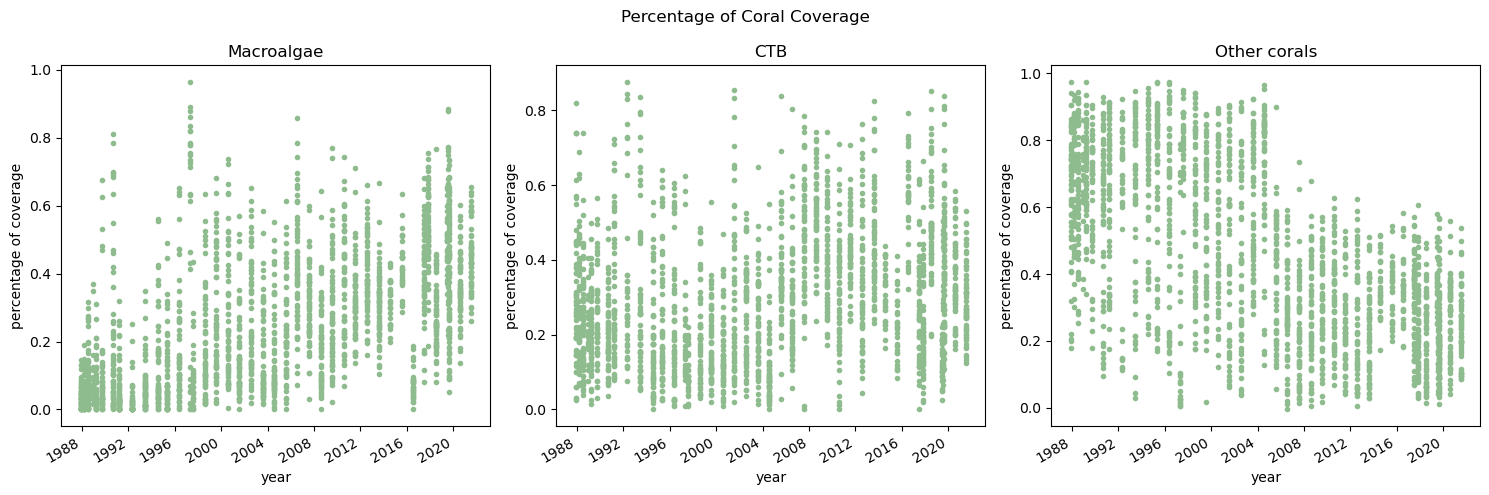

In [23]:
#plot coral 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))
df.plot(ax = ax1,y = ["percentCover_macroalgae"], linestyle = 'None', marker = '.', color = ['darkseagreen'], title = 'Macroalgae', ylabel='percentage of coverage', xlabel = 'year',legend=False)

df.plot(ax = ax2,y = [ "percentCover_CTB"], linestyle = 'None', marker = '.', color = ['darkseagreen'], title = 'CTB', ylabel='percentage of coverage', xlabel = 'year',legend=False)

df.plot(ax = ax3,y = ["percentCover_other"], linestyle = 'None', marker = '.', color = ['darkseagreen'], title = 'Other corals', ylabel='percentage of coverage', xlabel = 'year',legend=False)

fig.suptitle("Percentage of Coral Coverage")
fig.tight_layout()
plt.show()

Plot histogram of difference in average coral coverage each year

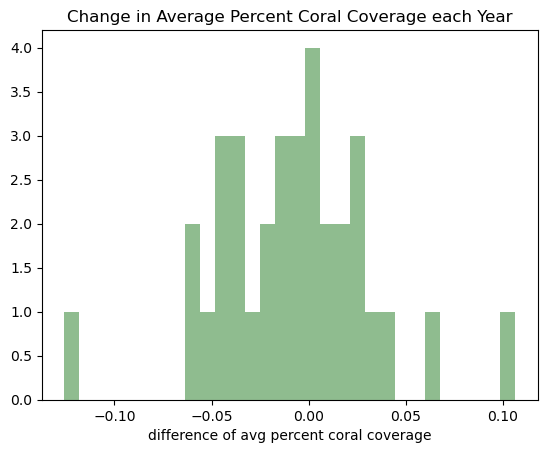

In [24]:
years = np.arange(1987,2022,1)
difference = []
for i in range(len(years)-1,0,-1):
    curr = df.loc[str(years[i])]
    past = df.loc[str(years[i-1])]
    difference.append(curr["percentCover_allCoral"].mean() - past["percentCover_allCoral"].mean())

plt.hist(difference,bins = 30, color = "darkseagreen")
plt.title("Change in Average Percent Coral Coverage each Year")
plt.xlabel("difference of avg percent coral coverage")
plt.show()

We see from the histogram that the change in coral reef cover tends to stay near zero from year to year. This supports our assumption that the cover will depend on previous years. We also see there is slightly more years with negative growth, further supporting our concern that coral reefs are getting smaller over time.

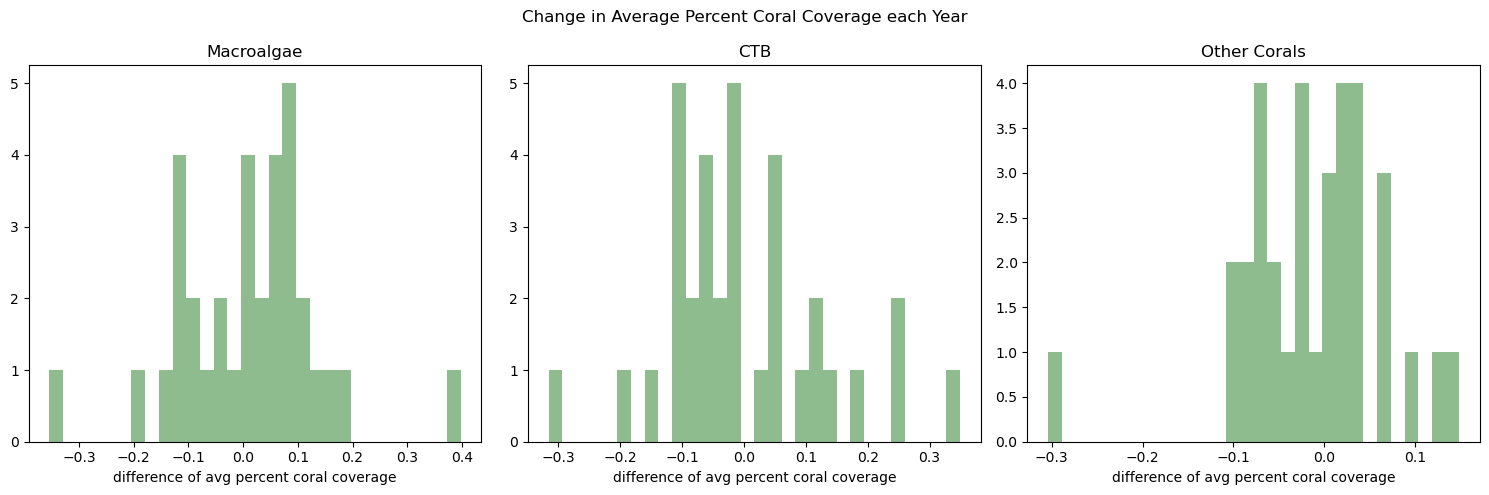

In [25]:
years = np.arange(1987,2022,1)

#initialize lists for changes in specific types of coral
difference_marco = []
difference_ctb = []
difference_other = []

#calculate the differences from year to year for each coral species
for i in range(len(years)-1,0,-1):
    curr = df.loc[str(years[i])]
    past = df.loc[str(years[i-1])]
    
    difference_marco.append(curr["percentCover_macroalgae"].mean() - past["percentCover_macroalgae"].mean())
    difference_ctb.append(curr["percentCover_CTB"].mean() - past["percentCover_CTB"].mean())
    difference_other.append(curr["percentCover_other"].mean() - past["percentCover_other"].mean())

#plot the percent change in coral reef coverage
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(difference_marco,bins = 30, color = "darkseagreen")
plt.title("Macroalgae")
plt.xlabel("difference of avg percent coral coverage")

plt.subplot(132)
plt.hist(difference_ctb,bins = 30, color = "darkseagreen")
plt.title("CTB")
plt.xlabel("difference of avg percent coral coverage")

plt.subplot(133)
plt.hist(difference_other,bins = 30, color = "darkseagreen")
plt.title("Other Corals")
plt.xlabel("difference of avg percent coral coverage")

plt.suptitle("Change in Average Percent Coral Coverage each Year")
plt.tight_layout()
plt.show()

A deeper look into data from 2012

In [26]:
#look at 2012
df_12 = df.loc['2012']
df_12

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
2012-08-01,Tektite,1,T1Q1,0.253,0.348,0.328,0.324
2012-08-01,Tektite,1,T1Q2,0.216,0.276,0.427,0.297
2012-08-01,Tektite,1,T1Q3,0.271,0.347,0.231,0.422
2012-08-01,Tektite,1,T1Q4,0.095,0.322,0.548,0.130
2012-08-01,Tektite,1,T1Q5,0.345,0.380,0.245,0.375
2012-08-01,Tektite,1,T1Q6,0.205,0.260,0.490,0.250
2012-08-01,Tektite,1,T1Q7,0.212,0.318,0.460,0.222
2012-08-01,Tektite,1,T1Q8,0.171,0.372,0.432,0.196
2012-08-01,Tektite,1,T1Q9,0.381,0.310,0.218,0.472


We also want to look at how ocean temperature affects the growth and loss of coral reefs. We observe an additional dataset recording the temperatures of the ocean in the U.S. Virgin Islands.

In [30]:
df_temp = pd.read_csv("seawatertemp.csv", index_col="Date")
df_temp.index = pd.to_datetime(df_temp.index)

In [31]:
# drop rows with no data in the temperature column and convert temperature values from strings to floats
df_temp["Temperature"] = df_temp[df_temp["Temperature"]!= 'nd']["Temperature"].astype(float)

# see which sites we have the temperature for
set(df_temp["Site"])

{'Tektite_14m', 'Yawzi_9m', 'Yawzi_NPS'}

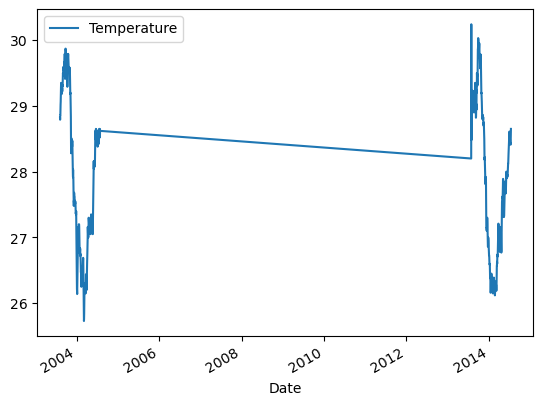

In [33]:
# plot temperature over time in Tektite area
df_temp[df_temp["Site"] == "Tektite_14m"].plot(y = "Temperature")
plt.show()

Note that the above site does not have as much data, which we will need to address.

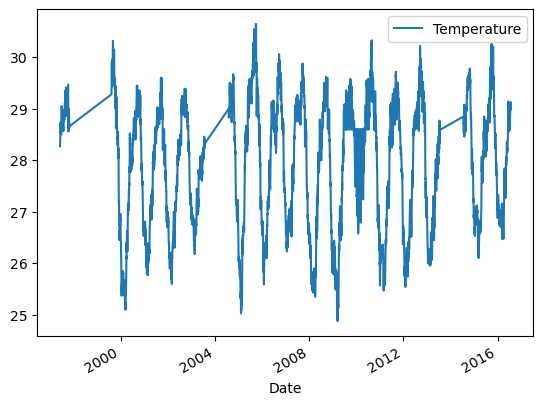

In [34]:
# plot temperature over time in Yawzi area
df_temp[df_temp["Site"] == "Yawzi_9m"].plot(y = "Temperature")
plt.show()